Matplotlib is building the font cache; this may take a moment.


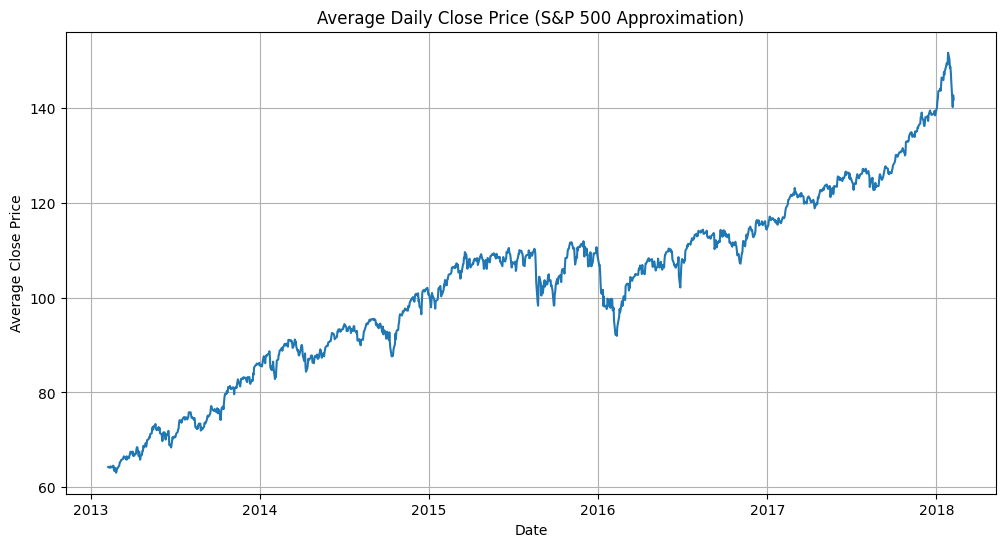

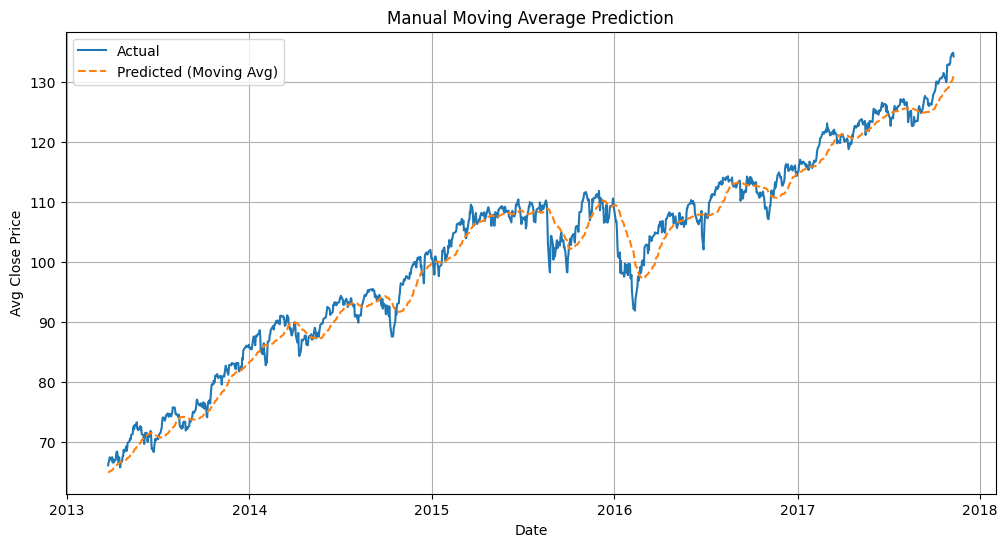

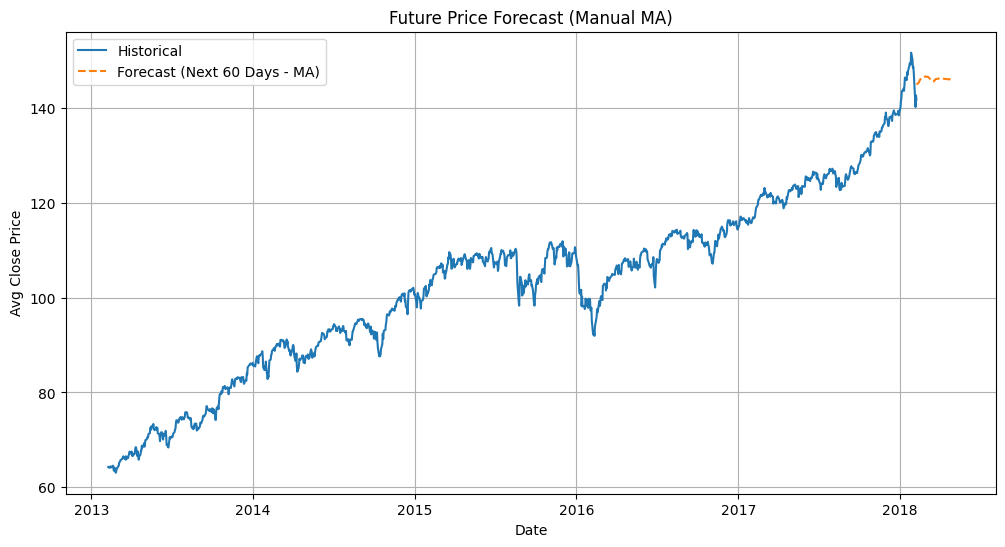

RMSE of Moving Average Forecast: 2.61


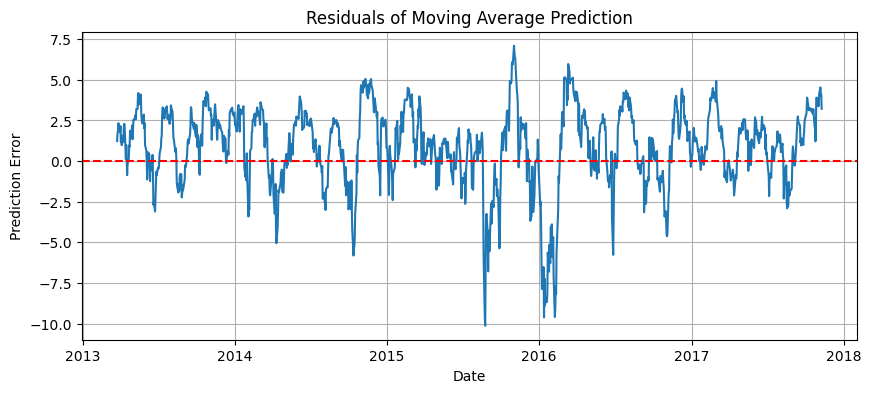

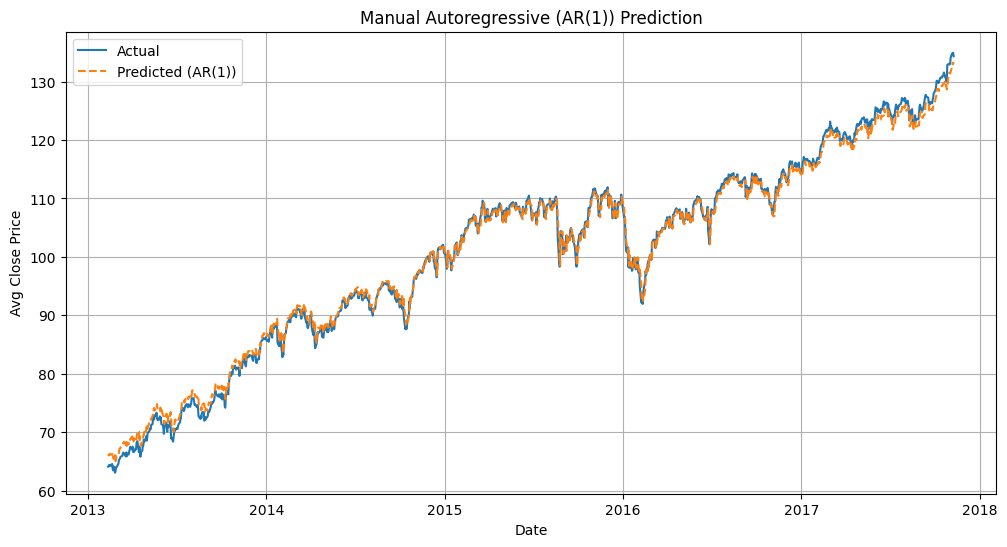

RMSE of AR(1) Forecast: 1.20


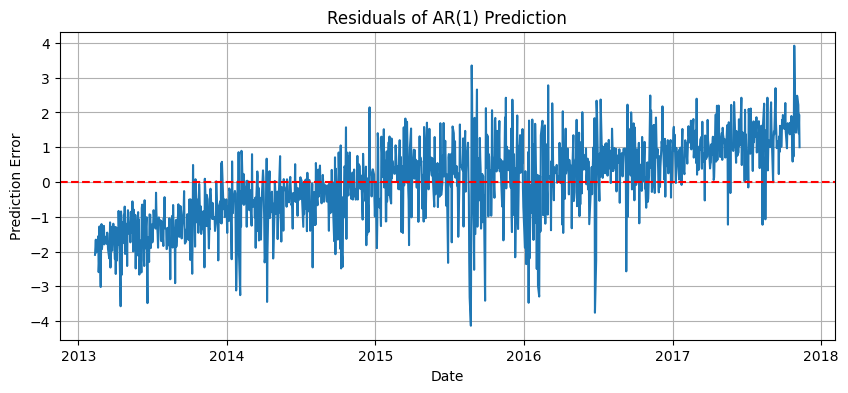

In [1]:
# Manual Time Series Forecasting for S&P 500 using Moving Average and Autoregression
# Dataset: all_stocks_5yr.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 1: Load and preprocess data
df = pd.read_csv('all_stocks_5yr.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['date'])

# Aggregate to S&P-like index by averaging closing prices across all stocks
daily_avg = df.groupby('date')['close'].mean().reset_index()
daily_avg.columns = ['date', 'avg_close']

# Plot overall trend
plt.figure(figsize=(12, 6))
plt.plot(daily_avg['date'], daily_avg['avg_close'])
plt.title('Average Daily Close Price (S&P 500 Approximation)')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.grid(True)
plt.show()

# Step 2: Manual Moving Average Forecast
window_size = 30  # number of past days to use for prediction
forecast_days = 60  # how many days to predict into the future

data = daily_avg['avg_close'].values
predictions = []

for i in range(window_size, len(data) - forecast_days):
    window = data[i - window_size:i]
    pred = np.mean(window)
    predictions.append(pred)

prediction_dates = daily_avg['date'].values[window_size:len(data) - forecast_days]
true_values = data[window_size:len(data) - forecast_days]

plt.figure(figsize=(12, 6))
plt.plot(prediction_dates, true_values, label='Actual')
plt.plot(prediction_dates, predictions, label='Predicted (Moving Avg)', linestyle='--')
plt.title('Manual Moving Average Prediction')
plt.xlabel('Date')
plt.ylabel('Avg Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Forecast the next 60 business days with Moving Average
last_window = data[-window_size:]
future_preds = []

for _ in range(forecast_days):
    pred = np.mean(last_window)
    future_preds.append(pred)
    last_window = np.append(last_window[1:], pred)

last_date = daily_avg['date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days, freq='B')

plt.figure(figsize=(12, 6))
plt.plot(daily_avg['date'], daily_avg['avg_close'], label='Historical')
plt.plot(future_dates, future_preds, label='Forecast (Next 60 Days - MA)', linestyle='--')
plt.title('Future Price Forecast (Manual MA)')
plt.xlabel('Date')
plt.ylabel('Avg Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Evaluate and plot residuals for Moving Average
rmse = np.sqrt(mean_squared_error(true_values, predictions))
print(f'RMSE of Moving Average Forecast: {rmse:.2f}')

residuals = true_values - predictions
plt.figure(figsize=(10, 4))
plt.plot(prediction_dates, residuals)
plt.title('Residuals of Moving Average Prediction')
plt.xlabel('Date')
plt.ylabel('Prediction Error')
plt.grid(True)
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Step 5: Manual Autoregressive Forecasting (AR(1))
ar_order = 1
ar_predictions = []

for i in range(ar_order, len(data) - forecast_days):
    # Simple AR(1): predict next value as a*previous + b
    x_prev = data[i - ar_order]
    a = 0.95  # assume persistence
    b = 0.05 * np.mean(data)  # small offset
    pred = a * x_prev + b
    ar_predictions.append(pred)

ar_dates = daily_avg['date'].values[ar_order:len(data) - forecast_days]
ar_true_values = data[ar_order:len(data) - forecast_days]

plt.figure(figsize=(12, 6))
plt.plot(ar_dates, ar_true_values, label='Actual')
plt.plot(ar_dates, ar_predictions, label='Predicted (AR(1))', linestyle='--')
plt.title('Manual Autoregressive (AR(1)) Prediction')
plt.xlabel('Date')
plt.ylabel('Avg Close Price')
plt.legend()
plt.grid(True)
plt.show()

# AR(1) Residuals
ar_rmse = np.sqrt(mean_squared_error(ar_true_values, ar_predictions))
print(f'RMSE of AR(1) Forecast: {ar_rmse:.2f}')

ar_residuals = ar_true_values - ar_predictions
plt.figure(figsize=(10, 4))
plt.plot(ar_dates, ar_residuals)
plt.title('Residuals of AR(1) Prediction')
plt.xlabel('Date')
plt.ylabel('Prediction Error')
plt.grid(True)
plt.axhline(0, color='red', linestyle='--')
plt.show()